In [2]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [4]:
data = pd.read_csv('./ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
# загружаем датасет
data = pd.read_csv('ds_salaries.csv', index_col = 'Unnamed: 0')
# загружаем информацию по датасету
print('Типы данных и наличие пропусков:\n')
data.info()
print(f'\n- Количество столбцов: {data.shape[1]}')
print(f'- Количество строк: {data.shape[0]}')
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Типы данных и наличие пропусков:

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB

- Количество столбцов: 11
- Количество строк: 607
Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 11)


In [8]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Распределение зарплатных выплат по специалистам
Сформулируем более точные вопросы и ответим на них, проверив ответ на статистическую значимость.

Выросла ли зарплата специалистов Data Scientist в 2022 году по сравнению с 2021 годом?


In [9]:
data_scientist = data[data['job_title'] == 'Data Scientist']
data_agg = data_scientist.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Денежное содержание Data Scientist в зависимости от года')
data_agg

Денежное содержание Data Scientist в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.00,62726.0,105000.00,412000.0
2021,44.0,70215.77,45843.82,2859.0,32793.75,67233.5,100922.75,165000.0
2022,65.0,131366.94,55785.24,18442.0,95550.00,135000.0,170000.00,260000.0


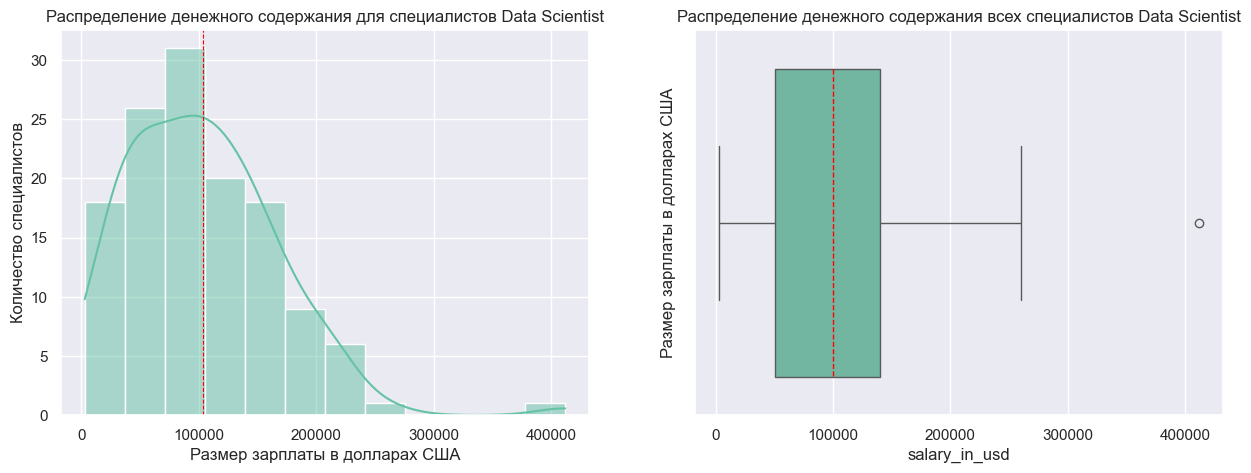

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data_scientist['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплаты в долларах США', ylabel='Количество специалистов')
axes[0].set_title('Распределение денежного содержания для специалистов Data Scientist')
axes[0].axvline(data_scientist['salary_in_usd'].mean(), color='red', linestyle='--',\
    linewidth=0.8)

sns.boxplot(data_scientist['salary_in_usd'], ax=axes[1], orient='h',\
    medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер зарплаты в долларах США')
axes[1].set_title('Распределение денежного содержания всех специалистов Data Scientist')

plt.show()

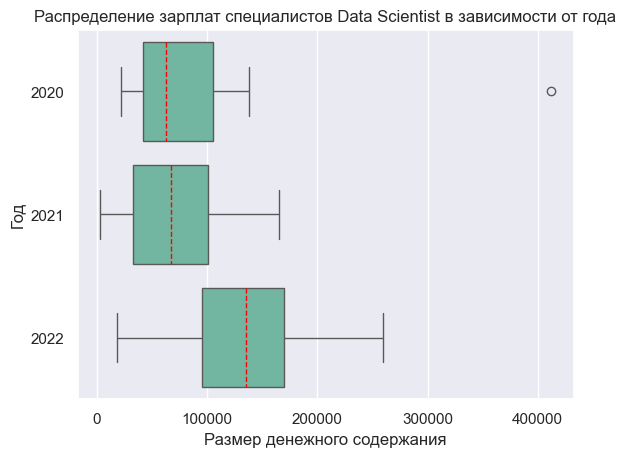

In [11]:
ax = sns.boxplot(data_scientist,x='salary_in_usd',y = 'work_year',orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер денежного содержания',ylabel='Год')
plt.title('Распределение зарплат специалистов Data Scientist в зависимости от года')
plt.show()

распределение размеров заработной платы специалистов в области Data Science зависит от года, и в целом можно наблюдать тенденцию роста зарплат в 2022 году по сравнению с 2021 годом. Для определения того, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистический тест.

Была ли зарплата специалистов Data Scientist больше, чем зарплата специалистов Data Engineer в 2022 году?

In [12]:
data_scientist=data[(data['job_title'] == 'Data Scientist') & (data['work_year'].isin([2022]))]
data_agg_d_s = data_scientist.groupby('work_year')['salary_in_usd'].describe().round(2)
display(data_agg_d_s)
data_engineer = data[(data['job_title'] == 'Data Engineer') & (data['work_year'].isin([2022]))]
data_agg_d_e = data_engineer.groupby('work_year')['salary_in_usd'].describe().round(2)
display(data_agg_d_e)

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2022,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.0,260000.0


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2022,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.0,324000.0


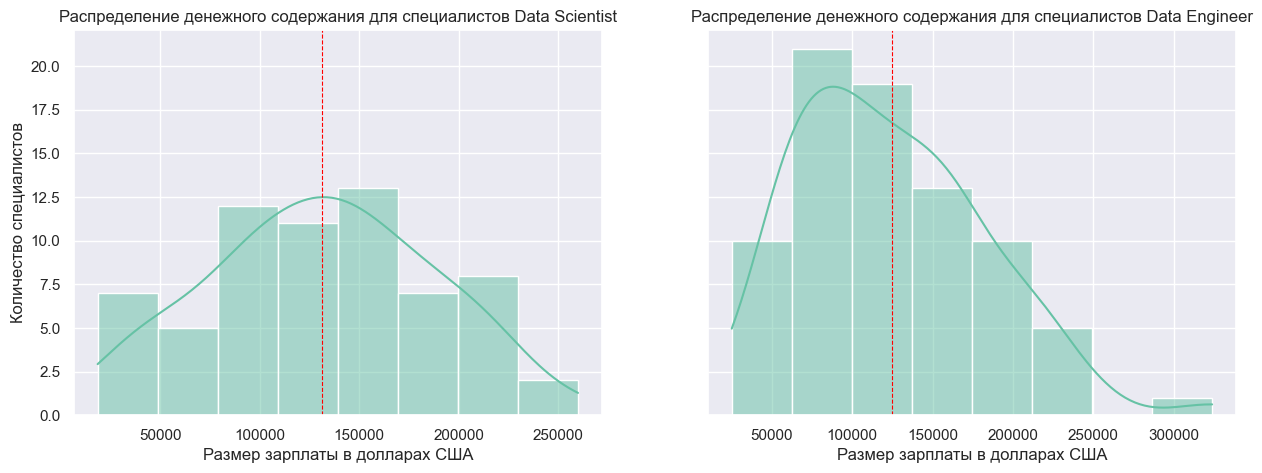

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5),  sharey=True)

sns.histplot(data_scientist['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплаты в долларах США', ylabel='Количество специалистов')
axes[0].set_title('Распределение денежного содержания для специалистов Data Scientist')
axes[0].axvline(data_scientist['salary_in_usd'].mean(), color='red', linestyle='--',\
    linewidth=0.8)

sns.histplot(data_engineer['salary_in_usd'], kde=True, ax=axes[1])
axes[1].set(xlabel='Размер зарплаты в долларах США', ylabel='Количество специалистов')
axes[1].set_title('Распределение денежного содержания для специалистов Data Engineer')
axes[1].axvline(data_engineer['salary_in_usd'].mean(), color='red', linestyle='--',\
    linewidth=0.8)

plt.show()

На первый взгляд размера заработных выплат специалистов Data Scientist ,больше специалистов Data Engineer в 2022 году. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

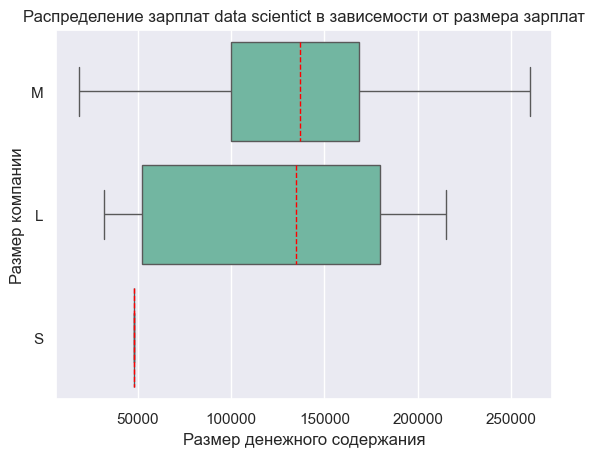

In [14]:
ax = sns.boxplot(data_scientist,x='salary_in_usd',y = 'company_size',orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер денежного содержания',ylabel='Размер компании')
plt.title('Распределение зарплат data scientict в зависемости от размера зарплат')
plt.show()

In [15]:
data_scientist = data[(data['job_title'] == 'Data Scientist')]
data_agg = data_scientist.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Зарплатные выплаты в зависимости от размера компании')
data_agg

Зарплатные выплаты в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,43.0,102743.42,73254.10,13400.0,45240.5,90734.0,135000.0,412000.0
M,66.0,120080.58,56347.79,4000.0,80000.0,119529.5,157500.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


На первый взгляд распределение размера заработных выплат специалистов Data Scientist в зависиости от размера компании различны. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.


Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

In [16]:
data_scientist = data[(data['job_title'] == 'Data Scientist')]
data_agg_d_s=data_scientist.groupby('company_size')['experience_level'].describe().round(2)
data_engineer=data[(data['job_title'] == 'Data Engineer')]
data_agg_d_e=data_engineer.groupby('company_size')['experience_level'].describe().round(2)
print('Зависимость вакансий Data Scientist и Data Engineer от опыта работы и размера компании')
display(data_agg_d_s, data_agg_d_e)


Зависимость вакансий Data Scientist и Data Engineer от опыта работы и размера компании


,count,unique,top,freq
company_size,,,,
L,43,3,MI,22
M,66,3,SE,32
S,21,3,MI,12


,count,unique,top,freq
company_size,,,,
L,34,3,MI,20
M,81,4,SE,41
S,6,3,SE,3


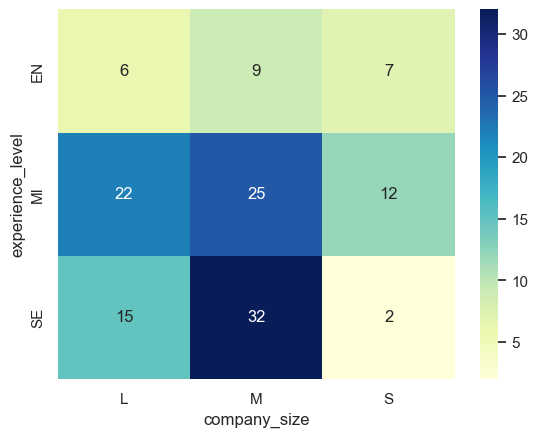

In [17]:
cross_tab = pd.crosstab(data_scientist['experience_level'], data_scientist['company_size'])
ax = sns.heatmap(cross_tab, annot=True, cmap="YlGnBu") 

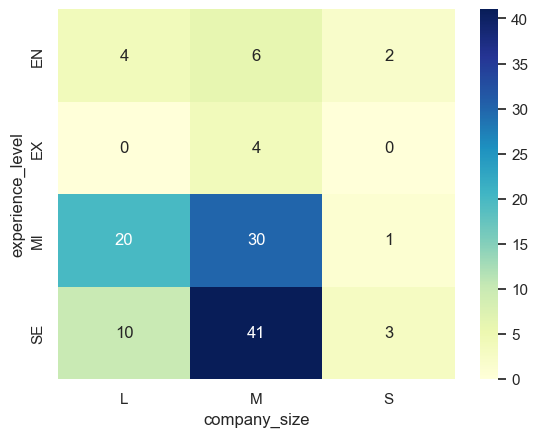

In [18]:
cross_tab = pd.crosstab(data_engineer['experience_level'], data_engineer['company_size'])
ax = sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")

распределение наличия вакансий специалистов Data Scientist и Data Engineer в зависиости от размера компании различны. Чтобы определить, являются ли эти различия статистически значимыми

In [19]:
data_agg = data['salary'].describe().round(2).to_frame()
display(data_agg)

,salary
count,565.00
mean,338115.99
std,1599878.79
min,4000.00
25%,67000.00
50%,110925.00
75%,165000.00
max,30400000.00


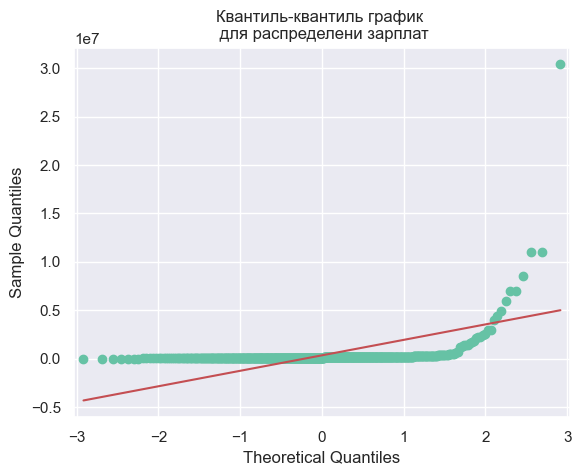

In [20]:
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
sm.qqplot(data['salary'], line='s')
plt.title('Квантиль-квантиль график \n для распределени зарплат')
# отображаем квантиль-квантиль график
plt.show()

пографику видно что данные распределены не нормально 

Можно ли утверждать, что зарплатные выплаты в зависимости от года растут?

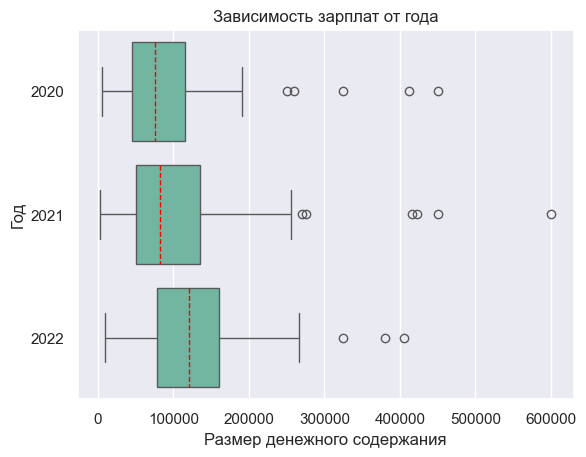

In [21]:
ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер денежного содержания', ylabel='Год')
plt.title('Зависимость зарплат от года')
plt.show()

In [22]:
data_agg = data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Денежное содержание в зависимости от года')
data_agg

Денежное содержание в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,215.0,99430.41,80304.32,2859.0,50000.0,82528.0,135000.0,600000.0
2022,278.0,123089.10,59888.93,10000.0,78791.0,120000.0,160000.0,405000.0


Распределения заработных выплат различны в зависимости от размера компании. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

Зарплатные выплаты в зависимости от местонахождения компании

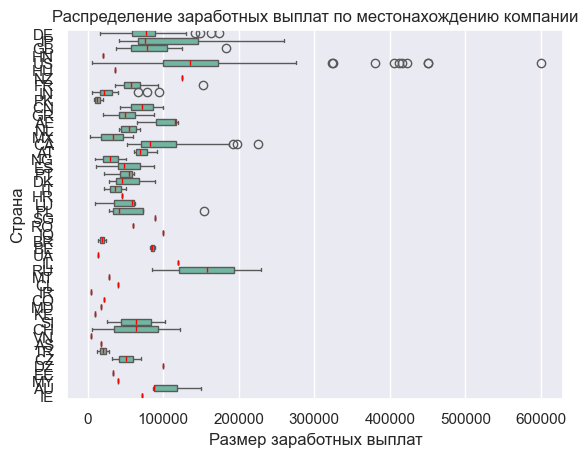

In [23]:
ax = sns.boxplot(data, x='salary_in_usd', y='company_location', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработных выплат', ylabel='Страна')
plt.title('Распределение заработных выплат по местонахождению компании')
plt.show()

In [24]:
data_agg = data.groupby('company_location')['salary_in_usd'].describe().round(2)
print('Распределение заработных выплат по местонахождению компании')
data_agg

Распределение заработных выплат по местонахождению компании


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
AE,3.0,100000.00,30413.81,65000.0,90000.00,115000.0,117500.00,120000.0
AS,1.0,18053.00,NaN,18053.0,18053.00,18053.0,18053.00,18053.0
AT,4.0,72920.75,13332.78,61467.0,64003.50,69489.5,78406.75,91237.0
AU,3.0,108042.67,36337.91,86703.0,87064.00,87425.0,118712.50,150000.0
BE,2.0,85699.00,4179.00,82744.0,84221.50,85699.0,87176.50,88654.0
BR,3.0,18602.67,5555.76,12901.0,15904.00,18907.0,21453.50,24000.0
CA,28.0,100121.86,47080.71,52000.0,70518.00,81895.5,117374.75,225000.0
CH,2.0,64114.00,82352.48,5882.0,34998.00,64114.0,93230.00,122346.0
CL,1.0,40038.00,NaN,40038.0,40038.00,40038.0,40038.00,40038.0


Распределения заработных выплат различны для разных компаний с учетом их местонахождения. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

Зарплатные выплаты в зависимости от опыта работы

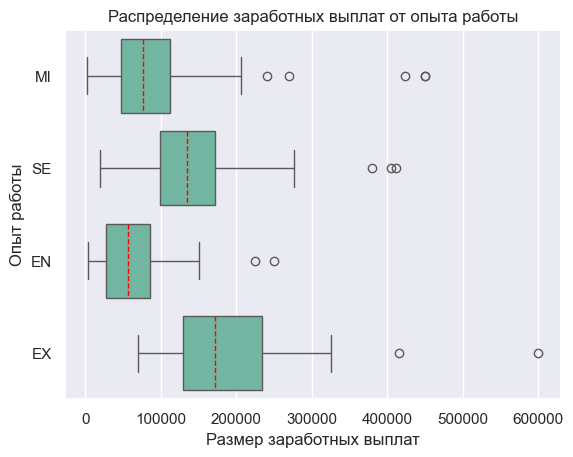

In [25]:
ax = sns.boxplot(data, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработных выплат', ylabel='Опыт работы')
plt.title('Распределение заработных выплат от опыта работы')
plt.show()

In [26]:
data_agg = data.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('Распределение заработных выплат от опыта работы')
data_agg

Распределение заработных выплат от опыта работы


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0
MI,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
SE,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0


Распределения заработных выплат различны в зависимости от опыта работы по занимаемой должности. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

Соотношение денежных выплат специалистов категории Data Scientist Data Engineer в зависимости от года, опыта работы и размера компании

In [27]:
data_scientist = data[data['job_title'] == 'Data Scientist']
data_agg = data_scientist.groupby(['experience_level', 'company_size'])['salary_in_usd'].describe().round()
print('Зависимость зарплат Data Scientist от опыта работы и размера компании')
data_agg    

Зависимость зарплат Data Scientist от опыта работы и размера компании


count      mean      std      min       25%  \
experience_level company_size                                                
EN               L               6.0   38365.0  16034.0  13400.0   31474.0   
                 M               9.0   56345.0  36341.0   4000.0   28399.0   
                 S               7.0   68569.0  30763.0  21669.0   50294.0   
MI               L              22.0   85263.0  40580.0  31615.0   42861.0   
                 M              25.0  100973.0  46420.0  33808.0   65438.0   
                 S              12.0   35957.0  27898.0   2859.0   12042.0   
SE               L              15.0  154132.0  91928.0  20171.0  111846.0   
                 M              32.0  152934.0  45392.0  77684.0  119567.0   
                 S               2.0   89488.0   2474.0  87738.0   88613.0   

                                    50%       75%       max  
experience_level company_size                                
EN               L              38322.0   49297.0   58000.0  
                 M              49646.0   86703.0  100000.0  
                 S              62726.0   95000.0  105000.0  
MI               L              84244.0  116436.0  160000.0  
                 M             100000.0  130000.0  200000.0  
                 S              33864.0   51682.0   82500.0  
SE               L             140400.0  192650.0  412000.0  
                 M             148000.0  180000.0  260000.0  
                 S              89488.0   90362.0   91237.0

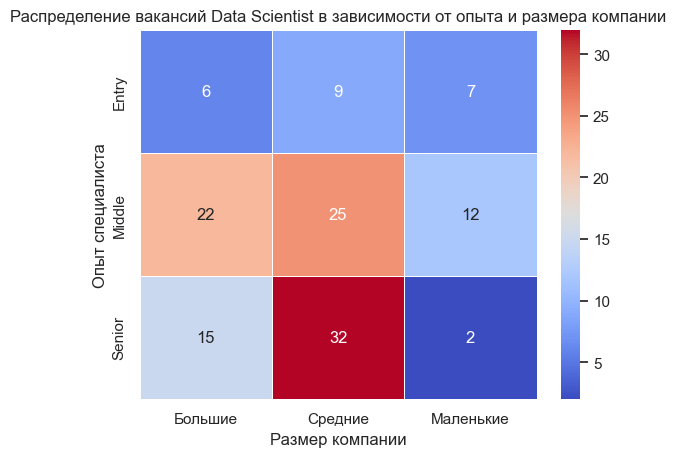

In [28]:
cross_tab = pd.crosstab(index=data_scientist['experience_level'], columns=data['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Опыт специалиста')
ax.set_xticklabels(['Большие', 'Средние', 'Маленькие'])
ax.set_yticklabels(['Entry', 'Middle', 'Senior'])
plt.title('Распределение вакансий Data Scientist в зависимости от опыта и размера компании')
plt.show()

In [29]:
data_scientist = data[data['job_title'] == 'Data Scientist']
data_agg = data_scientist.groupby(['experience_level', 'work_year'])['salary_in_usd'].describe().round()
print('Распределение зарплат Data Scientist от опыта работы в зависимости от года')
data_agg 

Распределение зарплат Data Scientist от опыта работы в зависимости от года


count      mean       std      min       25%  \
experience_level work_year                                                 
EN               2020         6.0   54983.0   28088.0  21669.0   42254.0   
                 2021        11.0   53622.0   34540.0   4000.0   29075.0   
                 2022         5.0   59508.0   33529.0  18442.0   40000.0   
MI               2020        11.0   71256.0   35724.0  35735.0   41339.0   
                 2021        26.0   71430.0   48131.0   2859.0   34812.0   
                 2022        22.0   99574.0   47753.0  31615.0   66412.0   
SE               2020         4.0  172916.0  160780.0  68428.0   85535.0   
                 2021         7.0   91782.0   48653.0  20171.0   65438.0   
                 2022        38.0  159229.0   43256.0  80000.0  126405.0   

                                 50%       75%       max  
experience_level work_year                                
EN               2020        50294.0   59875.0  105000.0  
                 2021        49646.0   85000.0  100000.0  
                 2022        52396.0   86703.0  100000.0  
MI               2020        62726.0   92416.0  138350.0  
                 2021        67234.0  113500.0  160000.0  
                 2022        95807.0  130000.0  200000.0  
SE               2020       105618.0  193000.0  412000.0  
                 2021        87738.0  119346.0  165000.0  
                 2022       154100.0  183825.0  260000.0

Вывод: Прирост зарплат по специальности Data Scientist наблюдается пр максимальных значениях по опыту работы middle. В остальных случаях утверждать о приросте некорректно.

In [30]:
data_engineer = data[data['job_title'] == 'Data Engineer']
data_agg = data_engineer.groupby(['experience_level', 'company_size'])['salary_in_usd'].describe().round()
print('Зависимость зарплат Data Engineer от опыта работы и размера компании')
data_agg

Зависимость зарплат Data Engineer от опыта работы и размера компании


count      mean      std       min       25%  \
experience_level company_size                                                 
EN               L               4.0   59418.0  22038.0   30428.0   48664.0   
                 M               6.0   60474.0  32739.0   21637.0   47443.0   
                 S               2.0   53344.0  16483.0   41689.0   47517.0   
EX               M               4.0  245500.0  55121.0  200000.0  212000.0   
MI               L              20.0   82641.0  44073.0   20000.0   52566.0   
                 M              30.0   85329.0  42458.0    4000.0   64412.0   
                 S               1.0   66022.0      NaN   66022.0   66022.0   
SE               L              10.0  140328.0  49835.0   47899.0  103850.0   
                 M              41.0  138615.0  47188.0   25000.0  108800.0   
                 S               3.0   75115.0  40772.0   33511.0   55172.0   

                                    50%       75%       max  
experience_level company_size                                
EN               L              63621.0   74375.0   80000.0  
                 M              55193.0   63268.0  120000.0  
                 S              53344.0   59172.0   65000.0  
EX               M             229000.0  262500.0  324000.0  
MI               L              78329.0  110000.0  200000.0  
                 M              80713.0   98864.0  206699.0  
                 S              66022.0   66022.0   66022.0  
SE               L             152300.0  177700.0  209100.0  
                 M             136994.0  165000.0  243900.0  
                 S              76833.0   95916.0  115000.0

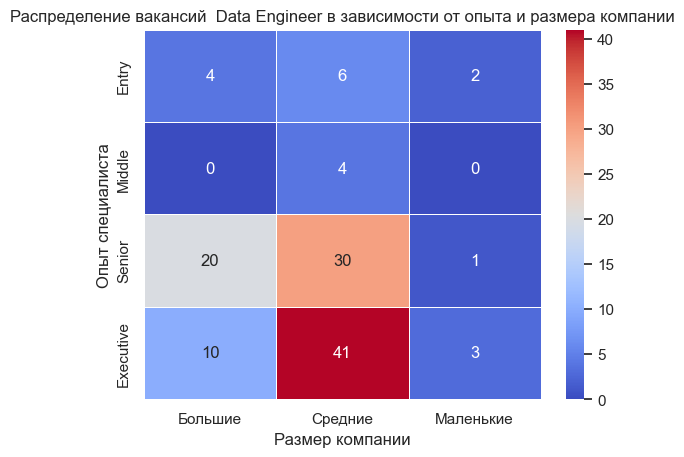

In [32]:
cross_tab = pd.crosstab(index=data_engineer['experience_level'], columns=data['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Опыт специалиста')
ax.set_xticklabels(['Большие','Cредние','Маленькие'])
ax.set_yticklabels(['Entry', 'Middle', 'Senior', 'Executive'])
plt.title('Распределение вакансий  Data Engineer в зависимости от опыта и размера компании')
plt.show()

In [33]:
data_engineer = data[data['job_title'] == 'Data Engineer']
data_agg = data_engineer.groupby(['experience_level', 'work_year'])['salary_in_usd'].describe().round()
print('Распределение зарплат Data Engineer от опыта работы в зависимости по года')
data_agg

Распределение зарплат Data Engineer от опыта работы в зависимости по года


count      mean      std       min       25%  \
experience_level work_year                                                 
EN               2020         2.0   48216.0   9230.0   41689.0   44952.0   
                 2021         5.0   53916.0  26184.0   21637.0   30428.0   
                 2022         5.0   68239.0  29789.0   45807.0   52351.0   
EX               2022         4.0  245500.0  55121.0  200000.0  212000.0   
MI               2020         6.0  100657.0  23701.0   70139.0   82098.0   
                 2021        20.0   71989.0  49637.0    4000.0   28281.0   
                 2022        25.0   89399.0  38022.0   49461.0   65949.0   
SE               2020         3.0   89803.0  85345.0   33511.0   40705.0   
                 2021         6.0  125519.0  34909.0   76833.0  100962.0   
                 2022        45.0  139763.0  47188.0   25000.0  108800.0   

                                 50%       75%       max  
experience_level work_year                                
EN               2020        48216.0   51479.0   54742.0  
                 2021        65013.0   72500.0   80000.0  
                 2022        58035.0   65000.0  120000.0  
EX               2022       229000.0  262500.0  324000.0  
MI               2020       108000.0  112154.0  130800.0  
                 2021        70976.0  102500.0  200000.0  
                 2022        78526.0   98158.0  206699.0  
SE               2020        47899.0  117950.0  188000.0  
                 2021       132500.0  150000.0  165000.0  
                 2022       136994.0  165400.0  243900.0

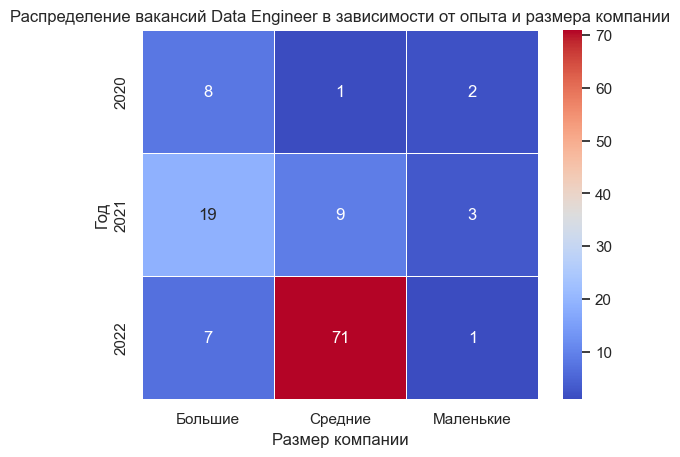

In [35]:
cross_tab = pd.crosstab(index=data_engineer['work_year'], columns=data['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Год')
ax.set_xticklabels(['Большие', 'Средние', 'Маленькие'])
ax.set_yticklabels(['2020', '2021', '2022'])
plt.title('Распределение вакансий Data Engineer в зависимости от опыта и размера компании')
plt.show()

Статистический анализ данных

In [36]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

Выросла ли зарплат специалистов Data Scientist в 2022 году по сравнению с 2021 годом?
Нулевая гипотеза (Но
): средний размер зарплат специалистов Data Scientist в 2022 году (М1
) статистически меньше либо равен размеру зарплат специалистов Data Scientist в 2021 году (М2
).


Альтернативная гипотеза (Н2
): средний размер зарплат специалистов Data Scientist в 2022 году (М1
) статистически больше, чем размер размер зарплат специалистов Data Scientist в 2021 году (М2
).

Проверка на нормальность

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

Нулевая гипотеза (
): распределение данные является нормальным.

Альтернативная гипотеза (
): распределение данных отлично от нормального

In [37]:
# значения зарплатных выплат
data_scientist = data[(data['job_title'] == 'Data Scientist') & (data['work_year'].isin([2022]))]
year_22 = data_scientist.loc[data_scientist['work_year']==2022, 'salary_in_usd']

data_scientist = data[(data['job_title'] == 'Data Scientist') & (data['work_year'].isin([2021]))]
year_21 = data_scientist.loc[data_scientist['work_year']==2021, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для Data Scientist в 2022 году:')
result = stats.shapiro(year_22)
decision_normality(result[1])

print('Для Data Scientist в 2021 году:')
result = stats.shapiro(year_21)
decision_normality(result[1])

Для Data Scientist в 2022 году:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для Data Scientist в 2021 году:
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

Какой тип у признака «Размер зарплатных выплат»? — Количественный.
Сколько сравниваемых групп? — Две.
Группы зависимы? — Нет.
Признак распределён по нормальному закону? — Да.
Чтобы проверить нашу гипотезу, можно использовать ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ для сравнения средних значений распределений

In [38]:
# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(year_22, year_21, alternative='greater', equal_var=True)
decision_hypothesis(p)

#print('p-value = {:.3f}'.format(p))


Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Отвергаем нулевую гипотезу в пользу альтернативной. Средний размер зарплат специалистов Data Scientist в 2022 году статистически больше, чем размер размер зарплат специалистов Data Scientist в 2021 году.

Была ли зарплата специалистов Data Scientist больше, чем зарплата специалистов Data Engineer в 2022 году?
Сформулируем нулевую и альтернативные гипотезы

Нулевая гипотеза (Н0)
): размер зарплат для специалистов Data Scientist (М1
) статистически больше либо равен размеру зарплат специалистов Data Engineer (М2
) в 2022 году.


Альтернативная гипотеза (Н1
): размер зарплат для специалистов Data Scientist (М1
) статистически меньше размеру зарплат специалистов Data Engineer (М2
) в 2022 году.

Проверка на нормальность

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально

In [39]:
data_scientist = data[(data['job_title'] == 'Data Scientist') & (data['work_year'].isin([2022]))]
year_ds = data_scientist.loc[data_scientist['work_year']==2022, 'salary_in_usd']

data_engineer = data[(data['job_title'] == 'Data Engineer') & (data['work_year'].isin([2022]))]
year_de = data_engineer.loc[data_engineer['work_year']==2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для Data Scientist в 2022 году:')
result = stats.shapiro(year_ds)
decision_normality(result[1])

print('Для Data Engineer в 2022 году:')
result = stats.shapiro(year_de)
decision_normality(result[1])

Для Data Scientist в 2022 году:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для Data Engineer в 2022 году:
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

Какой тип у признака «Размер зарплатных выплат»? — Количественный.
Сколько сравниваемых групп? — Две.
Группы зависимы? — Нет.
Признак распределён по нормальному закону? — Да.
Чтобы проверить нашу гипотезу, можно использовать ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ для сравнения средних значений распределений.

In [40]:
# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(year_ds, year_de, alternative='greater', equal_var=True)
decision_hypothesis(p)


Тест на равенство средних
p-value = 0.241
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


У нас нет оснований отвергнуть нулевую гипотезу, а значит размер зарплат для специалистов Data Scientist статистически больше либо равен размеру зарплат специалистов Data Engineer в 2022 году.

Различна ли зарплата специалистов Data Scientist в маленьких, средних и больших компаниях?

Сформулируем нулевую и альтернативные гипотезы

Нулевая гипотеза: размер зарплатных выплат специалистов Data Scientist не отличается в зависиомсти от размера компании: маленькие (м1
), средние (м2
) и большие (м3
).


Альтернативная гипотеза: размер зарплатных выплат специалистов Data Scientist отличается в зависиомсти от размера компании: маленькие (м1
), средние (м2
) и большие (м3
).



In [41]:
# значения зарплатных выплат
data_scientist = data[(data['job_title'] == 'Data Scientist')]
data_scientist_l = data_scientist.loc[data_scientist['company_size']=='L', 'salary_in_usd']
data_scientist_m = data_scientist.loc[data_scientist['company_size']=='M', 'salary_in_usd']
data_scientist_s = data_scientist.loc[data_scientist['company_size']=='S', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для большых компаний:')
result = stats.shapiro(data_scientist_l)
decision_normality(result[1])

print('Для средних компаний:')
result = stats.shapiro(data_scientist_m)
decision_normality(result[1])

print('Для маленьких компаний:')
result = stats.shapiro(data_scientist_s)
decision_normality(result[1])

Для большых компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для средних компаний:
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для маленьких компаний:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

Какой тип у признака «Размер компании»? — Количественный.
Сколько сравниваемых групп? — Три.
Группы зависимы? — Нет.
Признак распределён по нормальному закону? — Нет.
Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса

In [42]:
# проводим тест
_, p = stats.kruskal(data_scientist_l, data_scientist_m, data_scientist_s)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Вывод

Отвергаем нулевую гипотезу в пользу альтернативной, а значит размер зарплатных выплат специалистов Data Scientist отличается в зависиомсти от размера компании.



Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
Сформулируем нулевую и альтернативные гипотезы

Нулевая гипотеза: между специалистами Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

Альтернативная гипотеза: между специалистами Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).

Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

Какой тип у признака «Специалист»? — Категориальный.
Сколько сравниваемых групп? — Две.
Проверяется независимость групп? — Да.
Для проверки нашей гипотезы можно использовать критерий 
 (хи-квадрат).

In [43]:
data_c = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]
cross_table = pd.crosstab(data_c['job_title'], data['company_size'])

cross_table

company_size,L,M,S
job_title,,,
Data Engineer,34,81,6
Data Scientist,43,66,21


In [46]:
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Вывод

Отвергаем нулевую гипотезу в пользу альтернативной. Существует статистически значимая взаимосвязь между специалистами Data Scientist и Data Engineer и размером компани

Итоговые результаты исследования
Средний размер зарплат специалистов Data Scientist в 2022 году статистически больше, чем размер размер зарплат специалистов Data Scientist в 2021 году.
Размер зарплатных выплат специалистов Data Scientist отличается в зависиомсти от размера компании.
У нас нет оснований отвергнуть нулевую гипотезу, а значит размер зарплат для специалистов Data Scientist статистически больше либо равен размеру зарплат специалистов Data Engineer в 2022 году.
Существует статистически значимая взаимосвязь между специалистами Data Scientist и Data Engineer и размером компании.
Исходя из анализа данных, есть основания полагать, что на денежное содержание специалистов Data Scientist влияют следующие факторы:

experience_level — опыт работы;
employment_type — тип трудоустройства для этой роли;
job_title — роль, в которой соискатель работал в течение года;
company_size — среднее количество людей, работавших в компании в течение года.